<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/7_4_Activity_cliffs__and_landscapes__Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity Cliffs**

---
Made by: Brayan Raziel Cedillo González and Karen Pelcastre

Contact: brayanraziel1997@gmail.com

**Last Update:** March 2025


#Content
---

>[Activity Cliffs](#scrollTo=AhdGReZtVza8)

>[Content](#scrollTo=oYz6L0VEXFIu)

>[Preparation of the environment](#scrollTo=nFKgIHsCXMKZ)

>[1. Obtain database](#scrollTo=fnNJ1mKEOikJ)

>>[1.1 Upload and read database](#scrollTo=pnf9SsmJbbmr)

>>[1.2. Pretreatment of the database](#scrollTo=0TtKr9MuXmJP)

>[2. Activity differences](#scrollTo=2QBMiAzWhB7P)

>>[2.1. First implementation: Iterative loop](#scrollTo=X0IjDIUztHe7)

>>[2.2. Second implementation: Comparision matrix](#scrollTo=4mggZJ3BtFMB)

>>>[2.2.1. Heat map](#scrollTo=A_jJZ1iQn2y3)

>[3. Molecular similarity calculation](#scrollTo=6F4_hZrHXCwy)

>>[3.1. First implementation: Iterative loop](#scrollTo=uPjg-8xmkqKk)

>>[3.2. Second implementation: Similarity matrix](#scrollTo=dSiwXtMkL7kf)

>>>[3.2.1.Heat map](#scrollTo=LyU4g_aIMCsI)

>>>[3.2.2. SALI values](#scrollTo=tZEt6klBjtSM)

>[4. Visualization and data analysis](#scrollTo=UPDMF4YhYlv3)

>>[4.1. SAS map or activity landscapes (ALs)](#scrollTo=UHxIg6j4t-l2)

>>[4.2. Identification of activity cliffs (ACs)](#scrollTo=woLotDBfT9vA)

>>>[4.2.1. Setting relative and absolute thresholds](#scrollTo=eVw-lJTJl1W6)

>>>[4.2.2. Visualization of activity cliffs](#scrollTo=6OMk19F6l5wf)

>[For more information](#scrollTo=kKNf15l1JLld)



#Preparation of the environment
---

In [ ]:
import time
tic =time.time()
from IPython.utils import io # Allows the use of "input - output."
import tqdm.notebook
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      pbar.update(20)
      !pip install rdkit
      !pip install molplotly # Plotly extension, to visualize 2D structures
      !pip install Pillow   # Generate images
      !pip install jupyter-dash    # Interact with visualized data
      !pip install dash-bootstrap-components  # Dash app design
      !pip install datamol  # Management of molecules Documentation: https://github.com/datamol-io/datamol
      !pip install sklearn  # Use of ML in Python. Documentation: https://scikit-learn.org/stable/
      !pip install yellowbrick # Visualize ML type modelds. Documentation: https://www.scikit-yb.org/en/latest/
      !pip install molfeat
      !pip install kaleido
      !pip install dash-bootstrap-components
      pbar.update(20)

      import os, sys, random, requests
      import pandas as pd
      import rdkit as rk #  Documentation: https://www.rdkit.org/docs/
      from rdkit import Chem, DataStructs
      from rdkit.Chem import AllChem, Draw, rdFMCS  # visualize and use structures
      from rdkit.Chem.Draw import rdMolDraw2D, IPythonConsole, rdDepictor
      rdDepictor.SetPreferCoordGen(True)
      IPythonConsole.drawOptions.minFontSize=25   # Instances to create images
      pbar.update(20)
      from rdkit.Geometry import DataStructs
      import numpy as np               # Documentation: https://numpy.org/doc/
      from numpy.ma.core import shape
      import math
      import seaborn as sns            # Documentation: https://seaborn.pydata.org/
      import matplotlib.pyplot as plt
      import plotly.express as px      # Documentation: https://plotly.com/python/
      import plotly.graph_objects as go
      from PIL import Image, ImageDraw, ImageFont   # Import fromPillow, visualize images, ImageDraw:source the user wishes
      pbar.update(20)
      from  jupyter_dash import JupyterDash
      import dash
      from dash import dcc, html, dash_table
      from dash.dependencies import Input, Output   # Generate web app
      import dash_bootstrap_components as dbc
      from google.colab import files # Download files
      from pydoc import classify_class_attrs
      import base64     # instances to codify information
      from io import BytesIO
      import datamol as dm
      from molfeat.calc import FPCalculator, FP_FUNCS
      from molfeat.trans import MoleculeTransformer
      from sklearn.model_selection import train_test_split
      from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
      from yellowbrick.regressor import prediction_error, residuals_plot
      from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error,classification_report, confusion_matrix, accuracy_score   # accuracy_score:importación de métricas
      from lightgbm import LGBMRegressor
      from xgboost import XGBRegressor
      import networkx as nx
      from functools import reduce
      pbar.update(20)
toc =time.time()
print("Time: "+ str((toc-tic))+" s")

  0%|          | 0/100 [00:00<?, ?it/s]

Time: 34.37899851799011 s


The goal of this case study is to make a similarity analysis from a set of compounds that act on GPR40. This target is of interest for studies related to DMT2. The chemical database was obtained from ChEMBL. The parameters that will be used to make the similarity analysis are: IC50 and the Tanimoto coefficient.


#*1. Obtain database*
---

There's two ways to upload the database:

1. Uploading and directly reading the file

1.   List item
2.   List item

(.csv, .xlsx)
2. Using the ChEMBL API.



## 1.1 Upload and read database

In [ ]:
url="https://raw.githubusercontent.com/DIFACQUIM/Cursos/main/Datasets/08_Similitud_GPR40.csv"
database_original_direct = pd.read_csv(url)
print(database_original_direct.info())
database_original_direct[0:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          107 non-null    object 
 1   Molecule Name               0 non-null      float64
 2   Molecule Max Phase          0 non-null      float64
 3   Molecular Weight            107 non-null    float64
 4   #RO5 Violations             107 non-null    int64  
 5   AlogP                       107 non-null    float64
 6   Compound Key                107 non-null    object 
 7   Smiles                      107 non-null    object 
 8   Standard Type               107 non-null    object 
 9   Standard Relation           107 non-null    object 
 10  Standard Value              107 non-null    float64
 11  Standard Units              107 non-null    object 
 12  pChEMBL Value               94 non-null     float64
 13  Data Validity Comment       0 non-n

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3740168,NaN,NaN,311.77,0,4.08,4,Cc1cc(COc2cccc(Cl)c2)nc(-c2ccccn2)n1,IC50,'=',...,Free fatty acid receptor 1,Homo sapiens,SINGLE PROTEIN,CHEMBL3739339,1,Scientific Literature,Medchemcomm,2015,NaN,NaN
1,CHEMBL3941880,NaN,NaN,356.38,0,3.72,34,O=S1(=O)c2ccccc2CN1c1cc(F)cc(Oc2ccccn2)c1,IC50,'>',...,Free fatty acid receptor 1,Homo sapiens,SINGLE PROTEIN,CHEMBL3860043,1,Scientific Literature,J Med Chem,2016,NaN,NaN


## 1.2. Pretreatment of the database


The curation of the database with the **"difference"** function (only extracts the columns of interest). To remove duplicates the InChL representation was considered. .

To quantify the activity landscape we use the **SALI value** (Structure-Activity Landscape Index):

    SALI(i,j) = |Ai − Aj|/ 1 − sim(i,j)

The SALI value was used to map the ACs in a structure-activity similarity (SAS) map, here we used a continuous color scale from x (low SALI values) until (high SALI values associated with ACs). For this segment we considered that two compounds are connected if they have a SALI value above the established cut-off limit (greater than 70 or 80% from all the values). https://pubs.rsc.org/en/content/articlehtml/2023/dd/d3dd00098b

In [ ]:
db_treatment = database_original_direct.drop(database_original_direct.columns.difference(['Molecule ChEMBL ID',
                                                                                          'Smiles',
                                                                                          'Standard Value']), axis=1)
db_treatment= db_treatment.rename(columns={'Standard Value':'IC50'})
db_treatment= db_treatment.sort_values(by=['IC50']).reset_index(drop=True) # Order according to IC50 to obtain a better visualization


# Create the InChI column
InChI_column = []
for i in db_treatment['Smiles']:     # For each compound 'i' inside of the database, it takes SMILES and it converts to InChI.
  i = Chem.MolFromSmiles(i)
  n_inchi = Chem.MolToInchiKey(i)
  InChI_column.append(n_inchi)
db_treatment.insert(2, 'InChI', InChI_column) #Add column with the InCHl representation


# Create "pIC50" (-log Ic50) column
db_treatment["pIC50"] = db_treatment["IC50"].apply(lambda x: -1 * math.log10(x*(10**-9)))
      # Note: before applying the logarithm we need to convert the IC50 units [for this case, 1 ^ -9 ].

# Delete duplicates
print(f"Original data: {db_treatment.shape}")
db_treatment.drop_duplicates(subset=['InChI', 'Smiles'])
print(f"Data after removing duplicates: {db_treatment.shape}")
db_treatment

Original data: (107, 5)
Data after removing duplicates: (107, 5)


,Molecule ChEMBL ID,Smiles,InChI,IC50,pIC50
0,CHEMBL485006,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,TXJDDXOYAJLWFR-RPBOFIJWSA-N,2.000,8.698970
1,CHEMBL485007,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,VENVRIJBCPACKH-RPBOFIJWSA-N,3.000,8.522879
2,CHEMBL519525,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,ORMHNVLLLLNTLA-RPWUZVMVSA-N,4.000,8.397940
3,CHEMBL3741349,Fc1ccc(OCc2cc(OCC(F)(F)F)nc(-c3ccccn3)n2)c(F)c1F,AUAOGLNQKWNYCN-UHFFFAOYSA-N,7.943,8.100015
4,CHEMBL483546,CCC(CC)CN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1...,PTAKLRIQLXIQFJ-UXHICEINSA-N,10.000,8.000000
...,...,...,...,...,...
102,CHEMBL3910333,O=S1(=O)c2ccccc2CN1c1cc(Cl)cc(Oc2ccccn2)c1,ROJVYIHWPWITEK-UHFFFAOYSA-N,100000.000,4.000000
103,CHEMBL3941880,O=S1(=O)c2ccccc2CN1c1cc(F)cc(Oc2ccccn2)c1,LDMHZAQFLWCKDT-UHFFFAOYSA-N,100000.000,4.000000
104,CHEMBL3899190,O=S1(=O)c2ccccc2CN1c1cccc(Oc2ccccn2)c1,YZSQMDOFTDXYBI-UHFFFAOYSA-N,100000.000,4.000000
105,CHEMBL3951664,N#Cc1ccccc1Oc1cc(F)cc(N2Cc3ccccc3S2(=O)=O)c1,VCHWKWOKAWKZRR-UHFFFAOYSA-N,100000.000,4.000000


# *2. Activity differences*
---

<a name='2.1'></a>

## 2.1. First implementation: Iterative loop

Iterative loop for each compound in the pretreated database.

Proposed instructions: create a list that stores all the possible results of the comparisons, next, iterate in each of the compounds that are in the database; meaning, we start a **for** instance that is going to iterate all the compounds. This is going to be our main loop; it can choose a fixed element with which it will be compared to the rest of the compounds.
Inside of this instance, we are going to start a **sub-loop** that is going to iterate all the compounds in the pretreated database parallel to the main loop.

However, this sub-loop has the characteristic that the iterative variable starts a position ahead of the loop, so this sub-loop is going to compare the fixed element and the variable element that was chosen for this sub-loop.

Finally, the comparison cases are stored in the list that we created at the beginning.


In [ ]:
Activity_comparision = [] # List to store comparisions

# Main iteration loop and select fixed element for comparision
for i in range(len(db_treatment)):
    Fixed_element = db_treatment.iloc[i]   # Note: 'iloc' only works to locate integers or boolean data types

      # Sub - loop: select variable element and comparision
    for j in range(i+1, len(db_treatment)):    # "i+1" to make sure it starts iterating a element after the 'Fixed_element'.
        Variable_element = db_treatment.iloc[j]

        # Comparate activity values
        Activity_difference = abs(Fixed_element["pIC50"] - Variable_element["pIC50"])

        # Add the comparision cases to the created list
        Activity_comparision.append({'Compound A': Fixed_element['Molecule ChEMBL ID'],
                                      'pIC50 A': Fixed_element['pIC50'],
                                      'Compound B': Variable_element['Molecule ChEMBL ID'],
                                      'pIC50 B': Variable_element['pIC50'],
                                      'Activity difference': Activity_difference})

# Dataframe with the results
activity_db = pd.DataFrame(Activity_comparision)
activity_db


,Compound A,pIC50 A,Compound B,pIC50 B,Activity difference
0,CHEMBL519525,8.397940,CHEMBL519358,7.537602,0.860338
1,CHEMBL519525,8.397940,CHEMBL485335,7.017729,1.380211
2,CHEMBL519525,8.397940,CHEMBL485328,7.698970,0.698970
3,CHEMBL519525,8.397940,CHEMBL485146,5.677781,2.720159
4,CHEMBL519525,8.397940,CHEMBL485131,8.000000,0.397940
...,...,...,...,...,...
5666,CHEMBL1777862,7.638272,CHEMBL1777860,7.397940,0.240332
5667,CHEMBL1777862,7.638272,CHEMBL1777855,7.309804,0.328468
5668,CHEMBL1777861,7.920819,CHEMBL1777860,7.397940,0.522879
5669,CHEMBL1777861,7.920819,CHEMBL1777855,7.309804,0.611015


## 2.2. Second implementation: Comparision matrix

We can simplify the previous by generating a comparison matrix considering only the pIC50 values and the result of the activity difference.

In [ ]:
%%time
hmap=pd.DataFrame()
for i in db_treatment.index:
    for j in db_treatment.index:
        a = db_treatment.loc[i,'pIC50'] # Fixed element
        b = db_treatment.loc[j,'pIC50'] # Variable element
        activity_difference = abs(a - b)
        hmap.loc[db_treatment.loc[i,'Molecule ChEMBL ID'],db_treatment.loc[j,'Molecule ChEMBL ID']]=activity_difference
hmap

<timed exec>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<timed exec>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

CPU times: user 5.34 s, sys: 39.5 ms, total: 5.38 s
Wall time: 5.41 s


,CHEMBL519525,CHEMBL519358,CHEMBL485335,CHEMBL485328,CHEMBL485146,CHEMBL485131,CHEMBL485025,CHEMBL485007,CHEMBL485006,CHEMBL484772,...,CHEMBL1777868,CHEMBL1777867,CHEMBL1777866,CHEMBL1777865,CHEMBL1777864,CHEMBL1777863,CHEMBL1777862,CHEMBL1777861,CHEMBL1777860,CHEMBL1777855
CHEMBL519525,0.000000,0.860338,1.380211,0.698970,2.720159,0.397940,1.591065,0.124939,0.301030,0.477121,...,2.793616,2.034428,0.875061,1.722222,0.511883,0.954243,0.759668,0.477121,1.000000,1.088136
CHEMBL519358,0.860338,0.000000,0.519873,0.161368,1.859821,0.462398,0.730727,0.985277,1.161368,0.383217,...,1.933278,1.174090,0.014723,0.861884,0.348455,0.093905,0.100670,0.383217,0.139662,0.227798
CHEMBL485335,1.380211,0.519873,0.000000,0.681241,1.339948,0.982271,0.210853,1.505150,1.681241,0.903090,...,1.413405,0.654217,0.505150,0.342011,0.868328,0.425969,0.620543,0.903090,0.380211,0.292075
CHEMBL485328,0.698970,0.161368,0.681241,0.000000,2.021189,0.301030,0.892095,0.823909,1.000000,0.221849,...,2.094646,1.335458,0.176091,1.023252,0.187087,0.255273,0.060698,0.221849,0.301030,0.389166
CHEMBL485146,2.720159,1.859821,1.339948,2.021189,0.000000,2.322219,1.129095,2.845098,3.021189,2.243038,...,0.073456,0.685731,1.845098,0.997937,2.208276,1.765917,1.960491,2.243038,1.720159,1.632023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL1777863,0.954243,0.093905,0.425969,0.255273,1.765917,0.556303,0.636822,1.079181,1.255273,0.477121,...,1.839373,1.080185,0.079181,0.767980,0.442359,0.000000,0.194575,0.477121,0.045757,0.133894
CHEMBL1777862,0.759668,0.100670,0.620543,0.060698,1.960491,0.361728,0.831397,0.884607,1.060698,0.282547,...,2.033948,1.274760,0.115393,0.962555,0.247784,0.194575,0.000000,0.282547,0.240332,0.328468
CHEMBL1777861,0.477121,0.383217,0.903090,0.221849,2.243038,0.079181,1.113943,0.602060,0.778151,0.000000,...,2.316495,1.557307,0.397940,1.245101,0.034762,0.477121,0.282547,0.000000,0.522879,0.611015
CHEMBL1777860,1.000000,0.139662,0.380211,0.301030,1.720159,0.602060,0.591065,1.124939,1.301030,0.522879,...,1.793616,1.034428,0.124939,0.722222,0.488117,0.045757,0.240332,0.522879,0.000000,0.088136


### 2.2.1. Heat map

In [ ]:
palette= sns.blend_palette(['cyan','lightcyan','lightcoral', 'firebrick'],72)
palette

[(np.float64(0.0), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.031003460207612455), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.07234140715109573), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.10334486735870818), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.14468281430219146), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.18602076124567474), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.2170242214532872), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.25836216839677045), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.2893656286043829), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.33070357554786617), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.3720415224913495), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.40304498269896194), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.4443829296424452), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.47538638985005766), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.5167243367935409), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.5580622837370242), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.5890657439446366), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.6304036908881199), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.6614071510957323), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.7027450980392157), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.744083044982699), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.7750865051903114), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.8164244521337947), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.8474279123414069), np.float64(1.0), np.float64(1.0)),
 (np.float64(0.8791695501730104),
  np.float64(0.9941407151095732),
  np.float64(0.9941407151095732)),
 (np.float64(0.8821222606689735),
  np.float64(0.9707035755478662),
  np.float64(0.9707035755478662)),
 (np.float64(0.8843367935409457),
  np.float64(0.953125720876586),
  np.float64(0.953125720876586)),
 (np.float64(0.8872895040369089),
  np.float64(0.9296885813148789),
  np.float64(0.9296885813148789)),
 (np.float64(0.8895040369088811),
  np.float64(0.9121107266435986),
  np.float64(0.9121107266435986)),
 (np.float64(0.8924567474048443),
  np.float64(0.8886735870818916),
  np.float64(0.8886735870818916)),
 (np.float64(0.8954094579008074),
  np.float64(0.8652364475201846),
  np.float64(0.8652364475201846)),
 (np.float64(0.8976239907727797),
  np.float64(0.8476585928489042),
  np.float64(0.8476585928489042)),
 (np.float64(0.9005767012687428),
  np.float64(0.8242214532871972),
  np.float64(0.8242214532871972)),
 (np.float64(0.902791234140715),
  np.float64(0.806643598615917),
  np.float64(0.806643598615917)),
 (np.float64(0.9057439446366782),
  np.float64(0.78320645905421),
  np.float64(0.78320645905421)),
 (np.float64(0.9086966551326413),
  np.float64(0.7597693194925028),
  np.float64(0.7597693194925028)),
 (np.float64(0.9109111880046136),
  np.float64(0.7421914648212226),
  np.float64(0.7421914648212226)),
 (np.float64(0.9138638985005767),
  np.float64(0.7187543252595155),
  np.float64(0.7187543252595155)),
 (np.float64(0.9168166089965398),
  np.float64(0.6953171856978084),
  np.float64(0.6953171856978084)),
 (np.float64(0.9190311418685121),
  np.float64(0.6777393310265283),
  np.float64(0.6777393310265283)),
 (np.float64(0.9219838523644752),
  np.float64(0.6543021914648213),
  np.float64(0.6543021914648213)),
 (np.float64(0.9241983852364475),
  np.float64(0.6367243367935409),
  np.float64(0.6367243367935409)),
 (np.float64(0.9271510957324106),
  np.float64(0.6132871972318339),
  np.float64(0.6132871972318339)),
 (np.float64(0.9301038062283737),
  np.float64(0.5898500576701269),
  np.float64(0.5898500576701269)),
 (np.float64(0.932318339100346),
  np.float64(0.5722722029988466),
  np.float64(0.5722722029988466)),
 (np.float64(0.9352710495963091),
  np.float64(0.5488350634371395),
  np.float64(0.5488350634371395)),
 (np.float64(0.9374855824682814),
  np.float64(0.5312572087658594),
  np.float64(0.53125720876

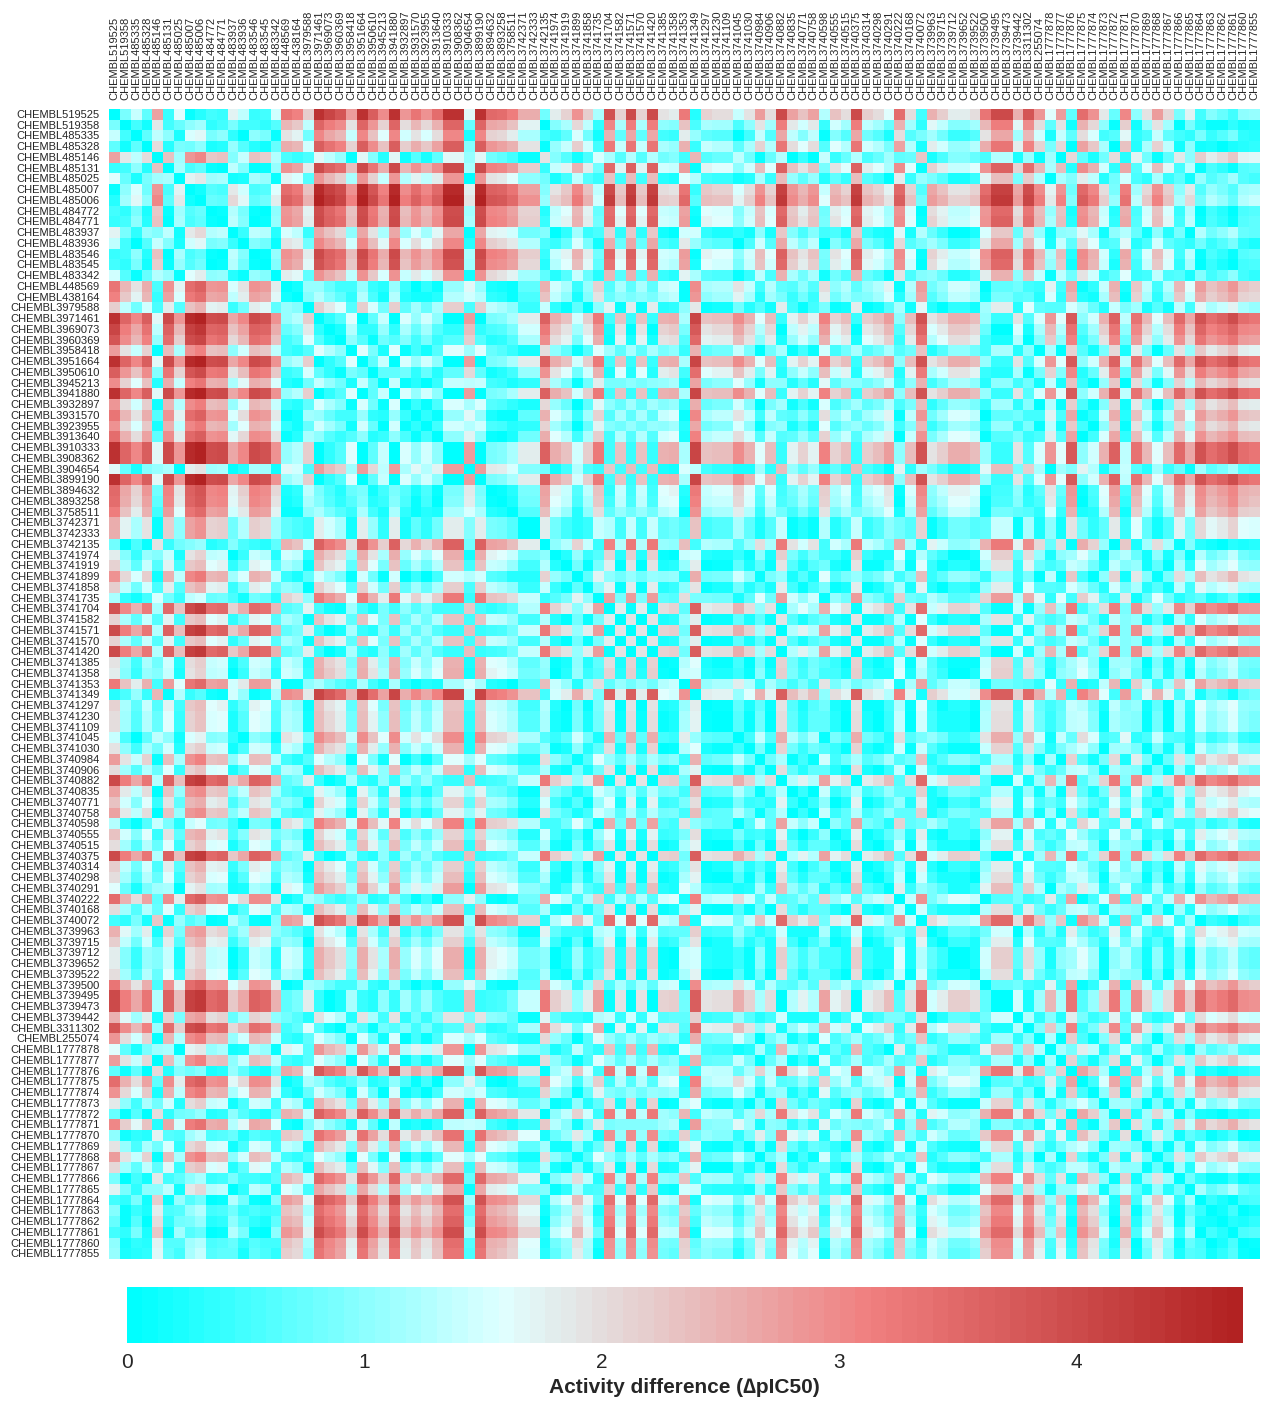

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(hmap,square = True, xticklabels=hmap.columns, yticklabels=hmap.index, cmap=palette,
            cbar_kws={'shrink':0.8,
                      'orientation':'horizontal','spacing':'uniform',
                      'pad':0.02})
ax.figure.axes[1].tick_params(axis="x", labelsize=15) # Size of the ticks
ax.figure.axes[1].set_xlabel('Activity difference (∆pIC50)', size=15, weight='bold') # cbar label
ax.tick_params(labelsize=1)
plt.xticks (np.arange(len(hmap.index))+0.5, hmap.index,rotation=90)
plt.yticks (np.arange(len(hmap.columns))+0.5, hmap.columns, rotation=0)
ax.xaxis.tick_top()
plt.tick_params ('both',width=1,labelsize=8)
plt.show()


#*3. Molecular similarity calculation*
---

In this section we are going to generate en iterative loop to obtain fingerprints (ECFP6) and then we are going to use Tanimoto coefficient to establish the similarity.

**Note:** You can use other types of molecular representations, not necessarily ECFP6.


## 3.1. First implementation: Iterative loop

In [ ]:
 tic =time.time()
Structure_comparision = [] # List to store comparisions
for i in range(len(db_treatment)):
    Fixed_element_id = db_treatment.loc[[i], ["Molecule ChEMBL ID"]]
    Fixed_element_df = db_treatment.loc[[i], ["Smiles"]]    # Iteration about the compounds in the database, in SMILES representation
    Fixed_element_str = Fixed_element_df.to_string(index = False, header = False)     # Since we need strings for the 'GetMorgan' method, we made the conversion with "tostring"
    Fixed_element_mol = Chem.MolFromSmiles(Fixed_element_str)    # Since we have the compounds with SMILES representation and string format, we use RDKit to generate a MOL type object
    fps_Fixed_element = AllChem.GetMorganFingerprintAsBitVect(Fixed_element_mol, 2, nBits = 1024)  # Morgan generates a fingerprint, we specify the radius (2) and image size (1024)

    for j in range(i+1, len(db_treatment)):               #Sub loop to generate the fingerprint for "variable_element".

        variable_element_id = db_treatment.loc[[j], ["Molecule ChEMBL ID"]]
        variable_element_df = db_treatment.loc[[j], ["Smiles"]]
        variable_element_str = variable_element_df.to_string(index = False, header = False)
        variable_element_mol = Chem.MolFromSmiles(variable_element_str)
        fps_variable_element = AllChem.GetMorganFingerprintAsBitVect(variable_element_mol, 3, nBits = 2048) #ECFP6

        Structure_difference = DataStructs.TanimotoSimilarity(fps_Fixed_element, fps_variable_element)

        Structure_comparision.append({"Compound A": Fixed_element_id.to_string(index = False, header = False),
                                       "Smiles A": Fixed_element_str,

                                      "Compound B": variable_element_id.to_string(index = False, header = False),
                                       "Smiles B": variable_element_str,

                                      "Structural similarity (Tanimoto)": Structure_difference})

db_structure = pd.DataFrame(Structure_comparision)  # Dataframe with the possible comparisions
toc =time.time()
print("Time: "+ str((toc-tic))+" s")
db_structure



Time: 17.449915885925293 s


,Compound A,Smiles A,Compound B,Smiles B,Structural similarity (Tanimoto)
0,CHEMBL519525,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL519358,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,0.413793
1,CHEMBL519525,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485335,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,0.419753
2,CHEMBL519525,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485328,CC[C@H](C)CN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]...,0.325843
3,CHEMBL519525,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485146,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,0.478873
4,CHEMBL519525,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485131,CCC(CC)CN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1...,0.325581
...,...,...,...,...,...
5666,CHEMBL1777862,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C#N)cc2Cl)cc1,CHEMBL1777860,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2C)cc1,0.478873
5667,CHEMBL1777862,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C#N)cc2Cl)cc1,CHEMBL1777855,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)...,0.348837
5668,CHEMBL1777861,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)cc1,CHEMBL1777860,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2C)cc1,0.636364
5669,CHEMBL1777861,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)cc1,CHEMBL1777855,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)...,0.608108


**Note :** you can simplify the code by specifying the data type "dtype=string" for the SMILES column in the pretreatment step.

## 3.2. Second implementation: Similarity matrix

In [ ]:
def tanimoto_calc(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)
    s = round(DataStructs.TanimotoSimilarity(fp1,fp2),3)
    return s

In [ ]:
db_treatment.sort_values(by=["Molecule ChEMBL ID"], ascending=False, inplace=True) # Sort according to ID
db_treatment.reset_index(drop=True, inplace=True)

tic =time.time()
hmap_similarity=pd.DataFrame()
for i in db_treatment.index:
    for j in db_treatment.index:
        a=db_treatment.loc[i].at['Smiles']
        b=db_treatment.loc[j].at['Smiles']
        alignment= tanimoto_calc(a,b)
        hmap_similarity.loc[db_treatment.loc[i,'Molecule ChEMBL ID'],db_treatment.loc[j,'Molecule ChEMBL ID']]=alignment
toc =time.time()
print("Time: "+ str((toc-tic))+" s")

hmap_similarity

<ipython-input-45-8eeab7e5f687>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hmap_similarity.loc[db_treatment.loc[i,'Molecule ChEMBL ID'],db_treatment.loc[j,'Molecule ChEMBL ID']]=alignment
<ipython-input-45-8eeab7e5f687>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hmap_similarity.loc[db_treatment.loc[i,'Molecule ChEMBL ID'],db_treatment.loc[j,'Molecule ChEMBL ID']]=alignment
<ipython-input-45-8eeab7e5f687>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Time: 17.149123907089233 s


,CHEMBL519525,CHEMBL519358,CHEMBL485335,CHEMBL485328,CHEMBL485146,CHEMBL485131,CHEMBL485025,CHEMBL485007,CHEMBL485006,CHEMBL484772,...,CHEMBL1777868,CHEMBL1777867,CHEMBL1777866,CHEMBL1777865,CHEMBL1777864,CHEMBL1777863,CHEMBL1777862,CHEMBL1777861,CHEMBL1777860,CHEMBL1777855
CHEMBL519525,1.000,0.455,0.467,0.314,0.506,0.320,0.597,0.516,0.528,0.716,...,0.128,0.146,0.113,0.140,0.153,0.147,0.136,0.121,0.127,0.116
CHEMBL519358,0.455,1.000,0.581,0.316,0.631,0.321,0.421,0.613,0.609,0.511,...,0.154,0.171,0.207,0.174,0.148,0.142,0.132,0.183,0.193,0.167
CHEMBL485335,0.467,0.581,1.000,0.330,0.707,0.337,0.432,0.602,0.616,0.529,...,0.125,0.131,0.110,0.118,0.129,0.133,0.123,0.108,0.114,0.113
CHEMBL485328,0.314,0.316,0.330,1.000,0.365,0.420,0.303,0.346,0.340,0.371,...,0.103,0.107,0.098,0.097,0.107,0.101,0.101,0.088,0.092,0.093
CHEMBL485146,0.506,0.631,0.707,0.365,1.000,0.372,0.468,0.679,0.697,0.579,...,0.137,0.144,0.131,0.139,0.152,0.146,0.135,0.118,0.125,0.123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL1777863,0.147,0.142,0.133,0.101,0.146,0.093,0.149,0.149,0.162,0.165,...,0.487,0.500,0.424,0.464,0.532,1.000,0.686,0.482,0.519,0.293
CHEMBL1777862,0.136,0.132,0.123,0.101,0.135,0.093,0.149,0.139,0.152,0.154,...,0.487,0.461,0.476,0.464,0.532,0.686,1.000,0.500,0.519,0.320
CHEMBL1777861,0.121,0.183,0.108,0.088,0.118,0.081,0.131,0.124,0.136,0.136,...,0.407,0.432,0.500,0.506,0.448,0.482,0.500,1.000,0.671,0.642
CHEMBL1777860,0.127,0.193,0.114,0.092,0.125,0.085,0.139,0.150,0.153,0.144,...,0.438,0.467,0.538,0.544,0.481,0.519,0.519,0.671,1.000,0.427


### 3.2.1.Heat map

In [ ]:
palette= sns.blend_palette(['green','greenyellow','yellow', 'orange'],72)
palette

[(np.float64(0.0), np.float64(0.5019607843137255), np.float64(0.0)),
 (np.float64(0.023944636678200692),
  np.float64(0.5195386389850057),
  np.float64(0.006505190311418685)),
 (np.float64(0.05587081891580162),
  np.float64(0.5429757785467128),
  np.float64(0.015178777393310266)),
 (np.float64(0.07981545559400231),
  np.float64(0.5605536332179931),
  np.float64(0.02168396770472895)),
 (np.float64(0.11174163783160324),
  np.float64(0.5839907727797001),
  np.float64(0.03035755478662053)),
 (np.float64(0.14366782006920414),
  np.float64(0.6074279123414071),
  np.float64(0.039031141868512115)),
 (np.float64(0.16761245674740485),
  np.float64(0.6250057670126874),
  np.float64(0.0455363321799308)),
 (np.float64(0.1995386389850058),
  np.float64(0.6484429065743944),
  np.float64(0.05420991926182238)),
 (np.float64(0.22348327566320647),
  np.float64(0.6660207612456748),
  np.float64(0.06071510957324106)),
 (np.float64(0.2554094579008074),
  np.float64(0.6894579008073818),
  np.float64(0.06938869665513264)),
 (np.float64(0.2873356401384083),
  np.float64(0.7128950403690888),
  np.float64(0.07806228373702423)),
 (np.float64(0.311280276816609),
  np.float64(0.730472895040369),
  np.float64(0.0845674740484429)),
 (np.float64(0.34320645905420993),
  np.float64(0.7539100346020762),
  np.float64(0.0932410611303345)),
 (np.float64(0.3671510957324106),
  np.float64(0.7714878892733563),
  np.float64(0.09974625144175317)),
 (np.float64(0.3990772779700116),
  np.float64(0.7949250288350634),
  np.float64(0.10841983852364476)),
 (np.float64(0.43100346020761243),
  np.float64(0.8183621683967705),
  np.float64(0.11709342560553633)),
 (np.float64(0.4549480968858131),
  np.float64(0.8359400230680507),
  np.float64(0.12359861591695502)),
 (np.float64(0.486874279123414),
  np.float64(0.8593771626297577),
  np.float64(0.1322722029988466)),
 (np.float64(0.5108189158016148),
  np.float64(0.8769550173010381),
  np.float64(0.13877739331026528)),
 (np.float64(0.5427450980392158),
  np.float64(0.9003921568627451),
  np.float64(0.14745098039215687)),
 (np.float64(0.5746712802768166),
  np.float64(0.9238292964244521),
  np.float64(0.15612456747404846)),
 (np.float64(0.5986159169550173),
  np.float64(0.9414071510957325),
  np.float64(0.16262975778546712)),
 (np.float64(0.6305420991926183),
  np.float64(0.9648442906574395),
  np.float64(0.17130334486735874)),
 (np.float64(0.6544867358708188),
  np.float64(0.9824221453287196),
  np.float64(0.17780853517877737)),
 (np.float64(0.6822145328719723),
  np.float64(1.0),
  np.float64(0.1821453287197232)),
 (np.float64(0.6973471741637831),
  np.float64(1.0),
  np.float64(0.17347174163783163)),
 (np.float64(0.7086966551326414),
  np.float64(1.0),
  np.float64(0.16696655132641292)),
 (np.float64(0.7238292964244522),
  np.float64(1.0),
  np.float64(0.15829296424452136)),
 (np.float64(0.7351787773933103),
  np.float64(1.0),
  np.float64(0.15178777393310267)),
 (np.float64(0.7503114186851212),
  np.float64(1.0),
  np.float64(0.14311418685121108)),
 (np.float64(0.765444059976932),
  np.float64(1.0),
  np.float64(0.1344405997693195)),
 (np.float64(0.7767935409457901),
  np.float64(1.0),
  np.float64(0.1279354094579008)),
 (np.float64(0.7919261822376009),
  np.float64(1.0),
  np.float64(0.11926182237600923)),
 (np.float64(0.803275663206459),
  np.float64(1.0),
  np.float64(0.11275663206459055)),
 (np.float64(0.8184083044982698),
  np.float64(1.0),
  np.float64(0.10408304498269899)),
 (np.float64(0.8335409457900808),
  np.float64(1.0),
  np.float64(0.09540945790080739)),
 (np.float64(0.8448904267589389),
  np.float64(1.0),
  np.float64(0.0889042675893887)),
 (np.float64(0.8600230680507497),
  np.float64(1.0),
  np.float64(0.08023068050749713)),
 (np.float64(0.8751557093425606),
  np.float64(1.0),
  np.float64(0.07155709342560553)),
 (np.float64(0.8865051903114187),
  np.float64(1.0),
  np.float64(0.06505190311418685)),
 (np.float64(0.9016378316032295),
  np.float64(1.0),
  np.float64(0.05637831603229529)),
 (np.float64(0.91298731257

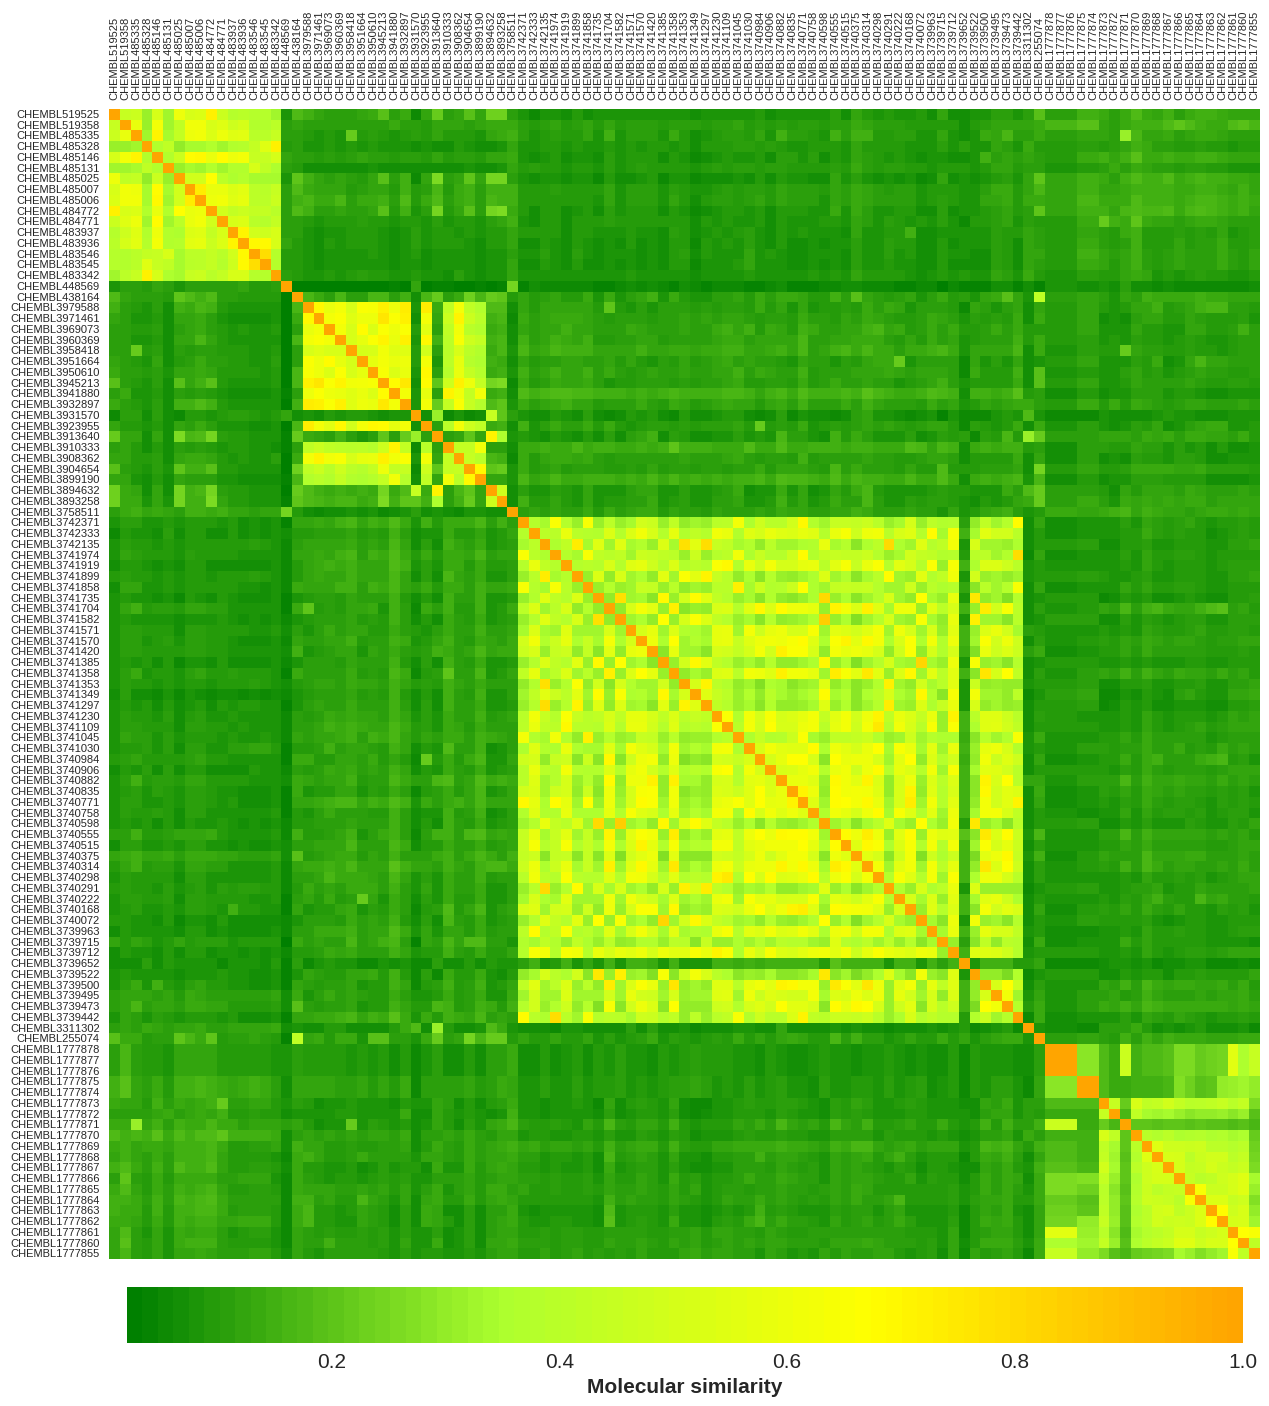

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(hmap_similarity,square = True, xticklabels=hmap_similarity.columns, yticklabels=hmap_similarity.index, cmap=palette,
            cbar_kws={'shrink':0.8,
                      'orientation':'horizontal','spacing':'uniform',
                      'pad':0.02})
ax.figure.axes[1].tick_params(axis="x", labelsize=15) #Ticks size
ax.figure.axes[1].set_xlabel('Molecular similarity', size=15, weight='bold') # cbar label
ax.tick_params(labelsize=1)
plt.xticks (np.arange(len(hmap_similarity.index))+0.5, hmap_similarity.index,rotation=90)
plt.yticks (np.arange(len(hmap_similarity.columns))+0.5, hmap_similarity.columns, rotation=0)
ax.xaxis.tick_top()
plt.tick_params ('both',width=1,labelsize=8)
plt.show()

### 3.2.2. SALI values

To quantify the activity landscape we use the **SALI value** (Structure-Activity Landscape Index):

    SALI(i,j) = |Ai − Aj|/ 1 − sim(i,j)

The SALI value was used to map the ACs in a structure-activity similarity (SAS) map, here we used a continuous color scale from x (low SALI values) until (high SALI values associated with ACs). For this segment we considered that two compounds are connected if they have a SALI value above the established cut-off limit (greater than 70 or 80% from all the values). https://pubs.rsc.org/en/content/articlehtml/2023/dd/d3dd00098b


In [ ]:
merge=activity_db.merge(right=db_structure, on=['Compound A', 'Compound B']) # Merge DF
merge= merge[['Compound A',	'pIC50 A', 'Smiles A','Compound B',	'pIC50 B','Smiles B','Activity difference ',	'Structural similarity (Tanimoto)']]

merge['pIC50 A'] = merge['pIC50 A'].round(4)
merge['pIC50 B'] = merge['pIC50 B'].round(4)
merge['Activity difference '] = merge['Activity difference '].round(4)
merge['Structural similarity (Tanimoto)'] = merge['Structural similarity (Tanimoto)'].round(4)
merge['SALI value'] = (merge['Activity difference '] / (1 - merge['Structural similarity (Tanimoto)'])).round(4)   # To obtain the SALI value we use the arithmetic expression without the need to iterate

merge

,Compound A,pIC50 A,Smiles A,Compound B,pIC50 B,Smiles B,Activity difference,Structural similarity (Tanimoto),SALI value
0,CHEMBL519525,8.3979,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL519358,7.5376,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,0.8603,0.4138,1.4676
1,CHEMBL519525,8.3979,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485335,7.0177,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,1.3802,0.4198,2.3788
2,CHEMBL519525,8.3979,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485328,7.6990,CC[C@H](C)CN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]...,0.6990,0.3258,1.0368
3,CHEMBL519525,8.3979,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485146,5.6778,CCCN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1ccc(O...,2.7202,0.4789,5.2201
4,CHEMBL519525,8.3979,O=C(O)[C@@H]1c2ccccc2C(=O)N(CC2CC2)[C@H]1c1ccc...,CHEMBL485131,8.0000,CCC(CC)CN1C(=O)c2ccccc2[C@@H](C(=O)O)[C@@H]1c1...,0.3979,0.3256,0.5900
...,...,...,...,...,...,...,...,...,...
5666,CHEMBL1777862,7.6383,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C#N)cc2Cl)cc1,CHEMBL1777860,7.3979,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2C)cc1,0.2403,0.4789,0.4611
5667,CHEMBL1777862,7.6383,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C#N)cc2Cl)cc1,CHEMBL1777855,7.3098,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)...,0.3285,0.3488,0.5045
5668,CHEMBL1777861,7.9208,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)cc1,CHEMBL1777860,7.3979,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2C)cc1,0.5229,0.6364,1.4381
5669,CHEMBL1777861,7.9208,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)cc1,CHEMBL1777855,7.3098,CC#CC(CC(=O)O)c1ccc(Oc2ccc(C(F)(F)F)cc2OC(F)F)...,0.6110,0.6081,1.5591


#*4. Visualization and data analysis*
---

Choosing the metric to define if something is an *”activity cliff”* depends in the context of the problem and the goals. However, some common metrics are:


1. **Absolute threshold**: you can establish an absolute threshold for the difference activity and consider any differences that exceed the threshold as *”activity cliffs”* . For example, you could say that any difference higher than 1.5 is a *“cliffs”*.

2. **Relative threshold**: instead of an absolute threshold, you can consider a relative threshold in function of the variability of the data. For example, you can define *”activity cliffs”* as those differences that exceed a certain amount of the standard deviation (sd).

3. **Percentile**: you can identify *”activity cliffs”* based on certain percentiles of the distribution of differences. For example, you could consider those above the top 90% as *“cliffs”*.

4. **Biological or chemical criteria**: depending on the problem, you can use biological or chemical knowledge to define *”activity cliffs”*. For example, you could consider as *”cliffs”* those differences that have significant changes in the chemical structure.

In [ ]:
# Create heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=merge["SALI value"],
    x=merge["Compound B"],
    y=merge["Compound A"],
    hoverongaps=False
))

# Set layout
fig.update_layout(
    title='Heatmap of the SALI value',
    xaxis_title='Compound B',
    yaxis_title='Compound A'
)

# Show heatmap
fig.show()


A higher SALI value suggests that the compounds are structurally similar but have different biological or chemical effects.


##4.1. SAS map or activity landscapes (ALs)

In [ ]:
fig_scatter = px.scatter(db_treatment,
                         x="Molecule ChEMBL ID",
                         y="pIC50",
                         title='Activity landscape',
                         width=1200,
                         height=800)
# This adds a dashed line for what a perfect model _should_ predict
y = db_treatment["pIC50"].values
fig_scatter.show()

In [ ]:
# Data of the scatter plot
similarity = merge['Structural similarity (Tanimoto)']
Activity_difference = merge['Activity difference ']

<ipython-input-76-7545ea02552b>:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



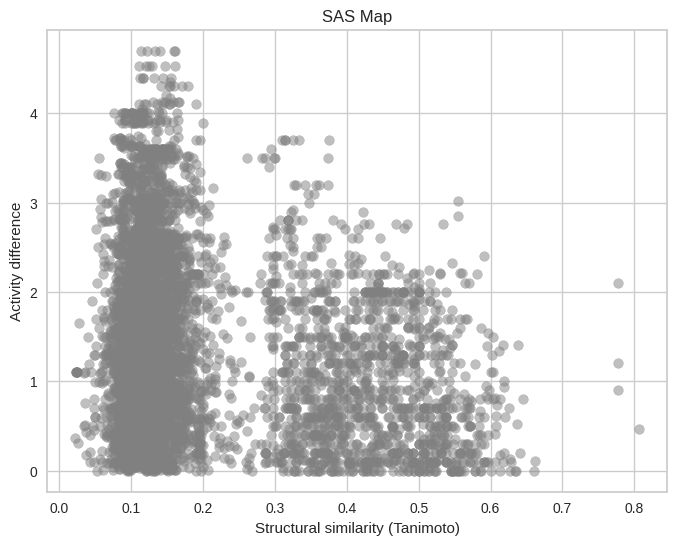

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(similarity, Activity_difference, color='gray', alpha=0.5)
plt.title('SAS Map')
plt.xlabel('Structural similarity (Tanimoto)')
plt.ylabel('Activity difference')
plt.grid(True)
plt.legend()
plt.show()

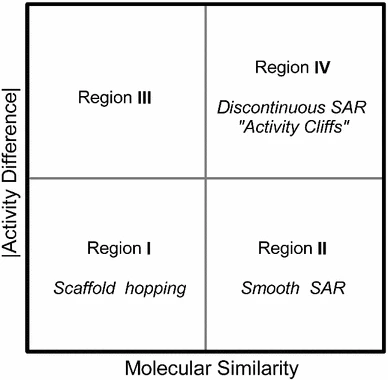

## 4.2. Identification of activity cliffs (ACs)

In [ ]:
def SAS_map(df, similarity_column, dif_activity_col, sali_col, threshold_x=None, threshold_y=None, set_title=str):
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid", font_scale=1.2)

    plt.scatter(df[similarity_column], df[dif_activity_col], color='gray', alpha=0.2)

    # If we provide thresholds, identify the points in the IV region
    if threshold_x is not None and threshold_y is not None:
        fourth_region_points = df[(df[similarity_column] > threshold_x) & (df[dif_activity_col] > threshold_y)]
        plt.scatter(fourth_region_points[similarity_column], fourth_region_points[dif_activity_col],
                    c=fourth_region_points[sali_col], cmap='coolwarm', s=100, alpha=0.8)
        plt.colorbar(label='SALI value')
        plt.axvline(x=threshold_x, color='red', linestyle='--', label='threshold X')
        plt.axhline(y=threshold_y, color='blue', linestyle='--', label='threshold Y')
    else:
        plt.scatter(df[similarity_column], df[dif_activity_col],
                    c=df[sali_col], cmap='coolwarm', s=100, alpha=0.8)
        plt.colorbar(label='SALI value')

    plt.title(set_title)
    plt.xlabel(similarity_column)
    plt.ylabel(dif_activity_col)
    plt.grid(True)
    plt.legend()
    return plt.show()

<ipython-input-77-d9306ace0808>:25: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



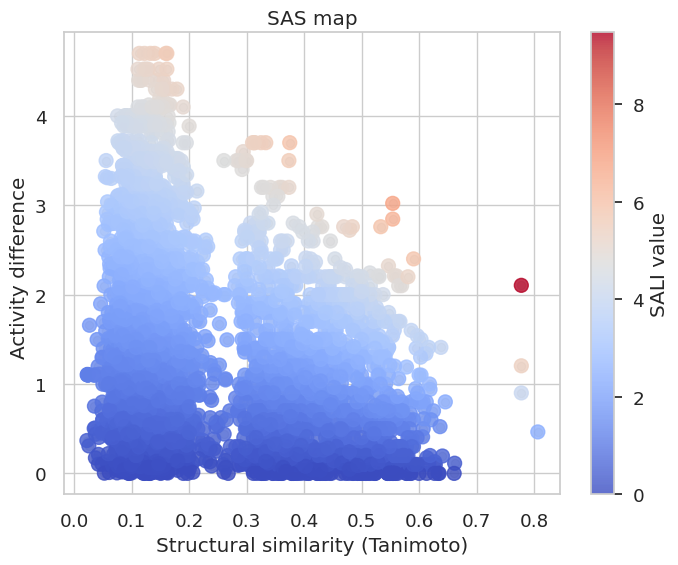

In [ ]:
# Use without thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', set_title= 'SAS map')

The calculated x threshold represents the strucutral similarity value above which the 10% of the pairs with the highest similarity in the database is found. The y threshold correponds to a logarithmic unit.

[0.8065, 0.7778, 0.7778, 0.7778, 0.6618, 0.661, 0.6456, 0.6406, 0.6379, 0.6364, 0.6349, 0.6333, 0.6282, 0.6271, 0.6269, 0.625, 0.6207, 0.619, 0.619, 0.6182, 0.6167, 0.6167, 0.6133, 0.6129, 0.6125, 0.6119, 0.6087, 0.6081, 0.6071, 0.6066, 0.6066, 0.6061, 0.6034, 0.6034, 0.6032, 0.6026, 0.6, 0.6, 0.5976, 0.5968, 0.5968, 0.5965, 0.5965, 0.5949, 0.5942, 0.5942, 0.5938, 0.5904, 0.5902, 0.5902, 0.5902, 0.5902, 0.5873, 0.5873, 0.5862, 0.5862, 0.5857, 0.5846, 0.5846, 0.5833, 0.5833, 0.5833, 0.5833, 0.5806, 0.5806, 0.5806, 0.5781, 0.5781, 0.5781, 0.5781, 0.5781, 0.5758, 0.5738, 0.5733, 0.5714, 0.5714, 0.5714, 0.5714, 0.5714, 0.5714, 0.5714, 0.5714, 0.5698, 0.5698, 0.5696, 0.5692, 0.5692, 0.5692, 0.569, 0.5676, 0.5667, 0.5667, 0.5667, 0.5645, 0.5645, 0.5645, 0.5645, 0.5645, 0.5645, 0.5625, 0.5625, 0.5625, 0.5625, 0.5606, 0.5606, 0.5606, 0.5606, 0.5593, 0.5593, 0.5588, 0.5574, 0.5574, 0.5574, 0.5574, 0.5574, 0.5571, 0.5568, 0.5556, 0.5556, 0.5556, 0.5541, 0.5541, 0.5538, 0.5538, 0.5538, 0.5522, 0.

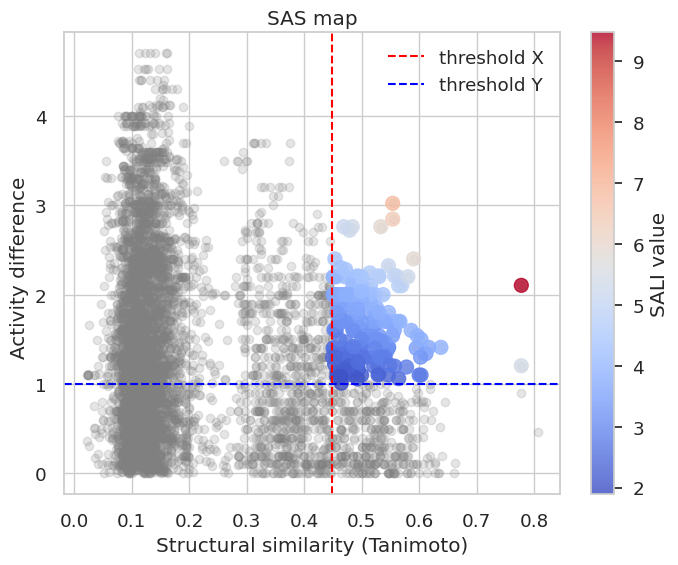

In [ ]:
similarity_scores=merge['Structural similarity (Tanimoto)'].tolist()
top_10_percent = int(0.1 * len(similarity_scores)) # Calculate the number of pairs in the top 10%
sorted_similarity_scores = sorted(similarity_scores, reverse=True) # Sort structural similarities from highest to lowest
print(sorted_similarity_scores)
threshold_x = sorted_similarity_scores[top_10_percent - 1] # The 10 percentil of the compounds with highest similarity
print("Threshold of the top 10 %:", threshold_x)
threshold_y = 1  # 1 logarithmic unit
# Example of use with thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', threshold_x=threshold_x, threshold_y=threshold_y, set_title='SAS map')

In [ ]:
print(f"Statistics of the column 'Activity difference': {merge['Activity difference '].describe()}")
print(f"Statistics of the column'Structural similarity (Tanimoto)': {merge['Structural similarity (Tanimoto)'].describe()}")
print(f"Statistics of the column 'SALI value': {merge['SALI value'].describe()}")

Statistics of the column 'Activity difference': count    5671.000000
mean        1.388091
std         0.990511
min         0.000000
25%         0.600000
50%         1.210000
75%         2.023100
max         4.699000
Name: Activity difference , dtype: float64
Statistics of the column'Structural similarity (Tanimoto)': count    5671.000000
mean        0.199217
std         0.141481
min         0.022200
25%         0.107800
50%         0.134000
75%         0.236700
max         0.806500
Name: Structural similarity (Tanimoto), dtype: float64
Statistics of the column 'SALI value': count    5671.000000
mean        1.739446
std         1.221669
min         0.000000
25%         0.740000
50%         1.509300
75%         2.606950
max         9.468900
Name: SALI value, dtype: float64


Considering the previous information, we can establish two types of thresholds, absolute ones (25%, 50% and 75%) and relative ones.
1. Activity difference (pIC50):
- Since the mean is 1.388 and the sd is 0.990511, we can consider thresholds that are in the 1 to 2 sd range of the mean. For example, we can define as **high** difference the activity of those higher than, e.g., 2.5 ( mean+2sd).

2. Structural similarity  (Tanimoto):
  - You can define as **high** similarity that which is greater than, e.g., (mean + * sd)

### 4.2.1. Setting relative and absolute thresholds

In [ ]:
# Absolute thresholds--->  considering 25%, 50% and 75%
thresholds_ActivityDiff_25= 0.600000
thresholds_Similarity_25 = 0.111100
thresholds_ActivityDiff_50= 1.210000
thresholds_Similarity_50 = 0.136400
thresholds_ActivityDiff_75= 2.023100
thresholds_Similarity_75 = 0.237950

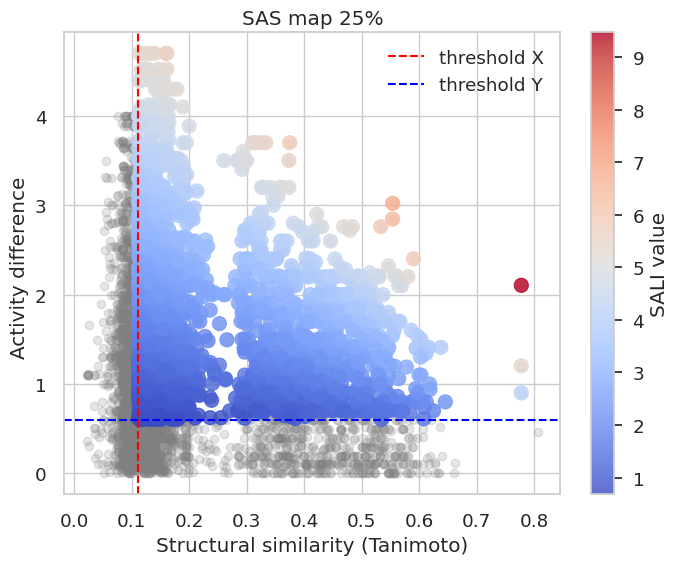

In [ ]:
# Example of the use of thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', threshold_x=thresholds_Similarity_25, threshold_y=thresholds_ActivityDiff_25, set_title='SAS map 25%')

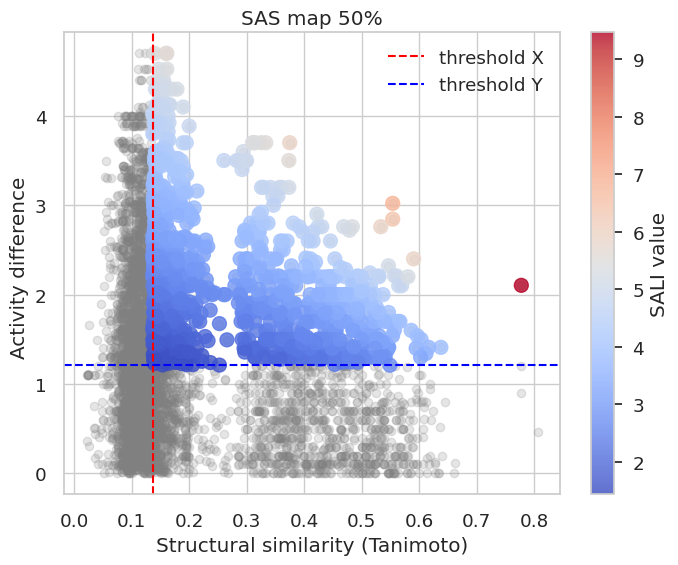

In [ ]:
# Example of the use of thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', threshold_x=thresholds_Similarity_50, threshold_y=thresholds_ActivityDiff_50, set_title='SAS map 50%')

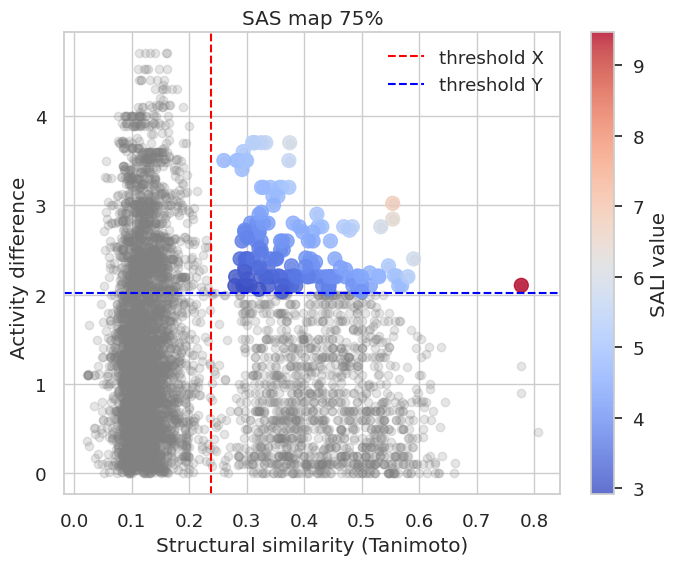

In [ ]:
# Example of the use of thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', threshold_x=thresholds_Similarity_75, threshold_y=thresholds_ActivityDiff_75, set_title='SAS map 75%')

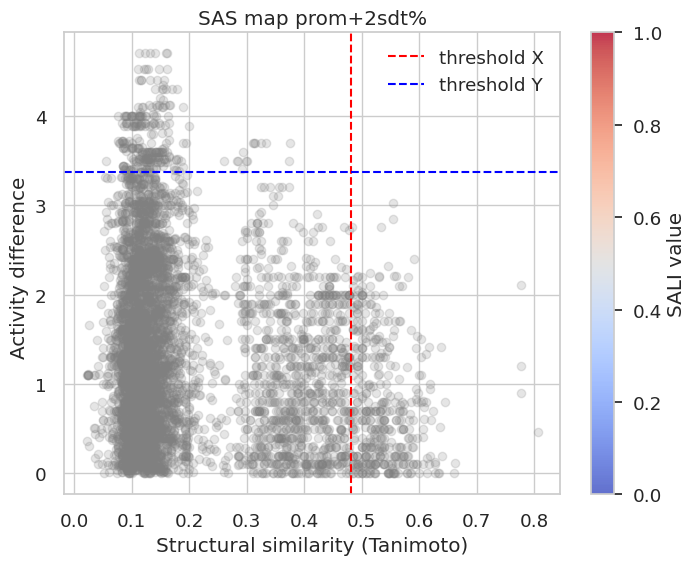

In [ ]:
# Relative thresholds considering mean + 2 times the sd
thresholds_ActivityDiff_rel= merge['Activity difference '].mean() + 2 * merge['Activity difference '].std()
thresholds_Similarity = merge['Structural similarity (Tanimoto)'].mean() + 2 * merge['Structural similarity (Tanimoto)'].std()
# Example of the use of thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', threshold_x=thresholds_Similarity, threshold_y=thresholds_ActivityDiff_rel, set_title='SAS map prom+2sdt%')

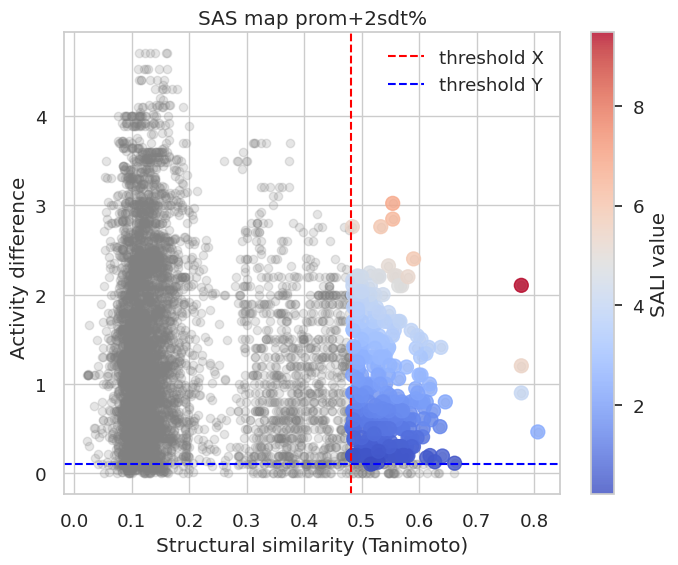

In [ ]:
# Relative thresholds considering mean + 2 times the sd and an activity difference < 0.1
y_cut_value_cliffs = 0.1
# Example of the use of thresholds
SAS_map(merge, similarity_column='Structural similarity (Tanimoto)', dif_activity_col='Activity difference ',
        sali_col='SALI value', threshold_x=thresholds_Similarity, threshold_y=y_cut_value_cliffs, set_title='SAS map prom+2sdt%')


### 4.2.2. Visualization of activity cliffs

In [ ]:
import molplotly
import plotly.express as px

def activity_cliffs_dinamic_visualization(df, title='', threshold_x=None, threshold_y=None):
    # Filter data if we are not using thresholds
    if threshold_x is not None and threshold_y is not None:
        df_filtered = df[(df["Structural similarity (Tanimoto)"] > threshold_x) &
                         (df["Activity difference "] > threshold_y)]
    else:
        df_filtered = df

    # Visualization
    fig_sasmap = px.scatter(df_filtered,
                            x="Structural similarity (Tanimoto)",
                            y="Activity difference ",
                            color="SALI value",
                            color_continuous_scale=['blue', 'red'],
                            title="SAS Map",
                            labels={'Structural similarity': 'Structural similarity',
                                    'Activity difference': 'Activity difference'},
                            hover_data=["Compound A", "Compound B"])

    return fig_sasmap.show()

In [ ]:
# Call the function with the ´merge´ dataframe
activity_cliffs_dinamic_visualization(merge, title='SAS Map')

In [ ]:
# Example of the use of thresholds
activity_cliffs_dinamic_visualization(merge, title='SAS Map', threshold_x=threshold_x, threshold_y=1)

---
#For more information

* Bajorath, Jürgen. 2014. “Exploring Activity Cliffs from a Chemoinformatics Perspective.” Molecular Informatics 33 (6-7): 438–42.
* David, Laurianne, Amol Thakkar, Rocío Mercado, and Ola Engkvist. 2020. “Molecular Representations in AI-Driven Drug Discovery: A Review and Practical Guide.” Journal of Cheminformatics 12 (1): 56.
* Pérez-Villanueva, Jaime, Oscar Méndez-Lucio, Olivia Soria-Arteche, and José L. Medina-Franco. 2015. “Activity Cliffs and Activity Cliff Generators Based on Chemotype-Related Activity Landscapes.” Molecular Diversity 19 (4): 1021–35.
